In [1]:
from keras.models import load_model
#!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

2022-11-29 17:14:01.333676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 17:14:01.552971: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 17:14:01.553021: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 17:14:02.472945: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

0.1.0


In [2]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_real_eyes_GFW"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [26]:
# extract eyes from extracted_face_image
def extract_eyes_from_extratced_face(filename, index, required_size = (300,100),left_eye_corner = 5, right_eye_corner = 95):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    if len(results)>=1:
        left_right_eye_x_diff = results[0]['keypoints']['right_eye'][0] - results[0]['keypoints']['left_eye'][0] 
        left_right_eye_y_diff = abs(results[0]['keypoints']['right_eye'][1] - results[0]['keypoints']['left_eye'][1]) 
    else:
        return False
    # extract the bounding box from the first face
    if left_right_eye_x_diff>=25 and left_right_eye_y_diff < 6:
        #print(results[0])
        try:
            xeye = left_eye_corner
            yeye = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2 -5)
            width = right_eye_corner
            height = int((yeye+results[0]['keypoints']['nose'][1])/2)
            eyes = pixels[yeye:height, xeye:width]
            # resize pixels to the model size
            image = Image.fromarray(eyes)
            image = image.resize(required_size)
            eyes_array = np.asarray(image)
            #plt.imshow(eyes_array)
            plt.imsave(os.path.join(savedirimage, 'eyes_img_{}.jpg'.format(index)),eyes_array)
            return True
        except:
            None
    return False

In [27]:
files = os.listdir('GFW/real_faces/')

In [28]:
image = Image.open(os.path.join('GFW/real_faces/',files[3]))

In [29]:
image.size

(100, 100)

In [30]:
image = image.convert('RGB')

In [31]:
pixels = np.asarray(image)

In [32]:
detector = MTCNN()

In [33]:
results = detector.detect_faces(pixels)

1/1 [==============================] - 0s 148ms/step


In [34]:
results

[{'box': [14, 14, 63, 77],
  'confidence': 0.9999983310699463,
  'keypoints': {'left_eye': (38, 42),
   'right_eye': (65, 43),
   'nose': (54, 58),
   'mouth_left': (40, 75),
   'mouth_right': (63, 75)}}]

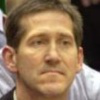

In [35]:
image.show()

In [36]:
len(files)

30000

In [37]:
index =1001
for i in range(2618,10000):
    if extract_eyes_from_extratced_face(os.path.join('GFW/real_faces/',files[i]), index = index) and index<=1000:
        print("------------" + str(i) +"---------")
        index+=1

1/1 [==============================] - 0s 134ms/step
------------1---------
1/1 [==============================] - 0s 159ms/step
------------2---------
1/1 [==============================] - 0s 134ms/step
------------3---------
1/1 [==============================] - 0s 136ms/step
------------4---------
1/1 [==============================] - 0s 179ms/step
------------5---------
1/1 [==============================] - 0s 147ms/step
------------6---------
1/1 [==============================] - 0s 128ms/step
------------8---------
1/1 [==============================] - 0s 127ms/step
------------9---------
1/1 [==============================] - 0s 121ms/step
------------11---------
1/1 [==============================] - 0s 127ms/step
------------12---------
1/1 [==============================] - 0s 155ms/step
------------13---------
1/1 [==============================] - 0s 123ms/step
------------14---------
1/1 [==============================] - 0s 165ms/step
------------16---------
1/1 [==

1/1 [==============================] - 0s 130ms/step
------------21---------
1/1 [==============================] - 0s 134ms/step
------------23---------
1/1 [==============================] - 0s 160ms/step
------------24---------
1/1 [==============================] - 0s 192ms/step
------------25---------
1/1 [==============================] - 0s 155ms/step
------------26---------
1/1 [==============================] - 0s 141ms/step
------------27---------
1/1 [==============================] - 0s 123ms/step
------------29---------
1/1 [==============================] - 0s 136ms/step
------------31---------
1/1 [==============================] - 0s 188ms/step
------------34---------
1/1 [==============================] - 0s 152ms/step
------------35---------
1/1 [==============================] - 0s 139ms/step
------------37---------
1/1 [==============================] - 0s 126ms/step
------------39---------
1/1 [==============================] - 0s 123ms/step
------------40---------

1/1 [==============================] - 0s 123ms/step
------------42---------
1/1 [==============================] - 0s 150ms/step
------------45---------
1/1 [==============================] - 0s 140ms/step
------------46---------
1/1 [==============================] - 0s 132ms/step
------------47---------
1/1 [==============================] - 0s 130ms/step
------------48---------
1/1 [==============================] - 0s 126ms/step
------------49---------
1/1 [==============================] - 0s 122ms/step
------------50---------
1/1 [==============================] - 0s 117ms/step
------------51---------
1/1 [==============================] - 0s 127ms/step
------------52---------
1/1 [==============================] - 0s 123ms/step
------------53---------
1/1 [==============================] - 0s 165ms/step
------------54---------
1/1 [==============================] - 0s 154ms/step
------------55---------
1/1 [==============================] - 0s 140ms/step
------------56---------

1/1 [==============================] - 0s 125ms/step
------------63---------
1/1 [==============================] - 0s 192ms/step
------------64---------
1/1 [==============================] - 0s 141ms/step
------------66---------
1/1 [==============================] - 0s 128ms/step
------------67---------
1/1 [==============================] - 0s 123ms/step
------------68---------
1/1 [==============================] - 0s 126ms/step
------------69---------
1/1 [==============================] - 0s 119ms/step
------------70---------
1/1 [==============================] - 0s 120ms/step
------------71---------
1/1 [==============================] - 0s 119ms/step
------------72---------
1/1 [==============================] - 0s 204ms/step
------------73---------
1/1 [==============================] - 0s 174ms/step
------------74---------
1/1 [==============================] - 0s 144ms/step
------------76---------
1/1 [==============================] - 0s 141ms/step
------------77---------

1/1 [==============================] - 0s 151ms/step
------------85---------
1/1 [==============================] - 0s 136ms/step
------------86---------
1/1 [==============================] - 0s 132ms/step
------------87---------
1/1 [==============================] - 0s 129ms/step
------------88---------
1/1 [==============================] - 0s 123ms/step
------------89---------
1/1 [==============================] - 0s 124ms/step
------------91---------
1/1 [==============================] - 0s 122ms/step
------------92---------
1/1 [==============================] - 0s 165ms/step
------------93---------
1/1 [==============================] - 0s 146ms/step
------------94---------
1/1 [==============================] - 0s 135ms/step
------------95---------
1/1 [==============================] - 0s 125ms/step
------------96---------
1/1 [==============================] - 0s 124ms/step
------------97---------
1/1 [==============================] - 0s 124ms/step
------------98---------

1/1 [==============================] - 0s 125ms/step
------------107---------
1/1 [==============================] - 0s 127ms/step
------------108---------
1/1 [==============================] - 0s 120ms/step
------------109---------
1/1 [==============================] - 0s 117ms/step
------------110---------
1/1 [==============================] - 0s 130ms/step
------------111---------
1/1 [==============================] - 0s 188ms/step
------------112---------
1/1 [==============================] - 0s 138ms/step
------------114---------
1/1 [==============================] - 0s 129ms/step
------------115---------
1/1 [==============================] - 0s 138ms/step
------------116---------
1/1 [==============================] - 0s 123ms/step
------------117---------
1/1 [==============================] - 0s 150ms/step
------------119---------
1/1 [==============================] - 0s 122ms/step
------------120---------
1/1 [==============================] - 0s 122ms/step
-----------

1/1 [==============================] - 0s 125ms/step
------------126---------
1/1 [==============================] - 0s 131ms/step
------------127---------
1/1 [==============================] - 0s 125ms/step
------------128---------
1/1 [==============================] - 0s 120ms/step
------------129---------
1/1 [==============================] - 0s 121ms/step
------------130---------
1/1 [==============================] - 0s 177ms/step
------------131---------
1/1 [==============================] - 0s 166ms/step
------------132---------
1/1 [==============================] - 0s 173ms/step
------------133---------
1/1 [==============================] - 0s 146ms/step
------------134---------
1/1 [==============================] - 0s 124ms/step
------------135---------
1/1 [==============================] - 0s 130ms/step
------------136---------
1/1 [==============================] - 0s 121ms/step
------------137---------
1/1 [==============================] - 0s 120ms/step
-----------

1/1 [==============================] - 0s 132ms/step
------------148---------
1/1 [==============================] - 0s 120ms/step
------------149---------
1/1 [==============================] - 0s 124ms/step
------------150---------
1/1 [==============================] - 0s 145ms/step
------------152---------
1/1 [==============================] - 0s 141ms/step
------------153---------
1/1 [==============================] - 0s 129ms/step
------------154---------
1/1 [==============================] - 0s 133ms/step
------------155---------
1/1 [==============================] - 0s 129ms/step
------------157---------
1/1 [==============================] - 0s 124ms/step
------------158---------
1/1 [==============================] - 0s 118ms/step
------------159---------
1/1 [==============================] - 0s 139ms/step
------------163---------
1/1 [==============================] - 0s 131ms/step
------------164---------
1/1 [==============================] - 0s 126ms/step
-----------

1/1 [==============================] - 0s 180ms/step
------------170---------
1/1 [==============================] - 0s 156ms/step
------------171---------
1/1 [==============================] - 0s 150ms/step
------------172---------
1/1 [==============================] - 0s 137ms/step
------------173---------
1/1 [==============================] - 0s 124ms/step
------------174---------
1/1 [==============================] - 0s 129ms/step
------------175---------
1/1 [==============================] - 0s 119ms/step
------------176---------
1/1 [==============================] - 0s 120ms/step
------------177---------
1/1 [==============================] - 0s 125ms/step
------------178---------
1/1 [==============================] - 0s 118ms/step
------------179---------
1/1 [==============================] - 0s 181ms/step
------------180---------
1/1 [==============================] - 0s 142ms/step
------------182---------
1/1 [==============================] - 0s 139ms/step
-----------

1/1 [==============================] - 0s 154ms/step
------------191---------
1/1 [==============================] - 0s 148ms/step
------------192---------
1/1 [==============================] - 0s 130ms/step
------------193---------
1/1 [==============================] - 0s 122ms/step
------------194---------
1/1 [==============================] - 0s 130ms/step
------------195---------
1/1 [==============================] - 0s 122ms/step
------------198---------
1/1 [==============================] - 0s 122ms/step
------------199---------
1/1 [==============================] - 0s 164ms/step
------------200---------
1/1 [==============================] - 0s 138ms/step
------------202---------
1/1 [==============================] - 0s 123ms/step
------------204---------
1/1 [==============================] - 0s 130ms/step
------------205---------
1/1 [==============================] - 0s 128ms/step
------------206---------
1/1 [==============================] - 0s 118ms/step
-----------

1/1 [==============================] - 0s 149ms/step
------------211---------
1/1 [==============================] - 0s 132ms/step
------------214---------
1/1 [==============================] - 0s 122ms/step
------------215---------
1/1 [==============================] - 0s 120ms/step
------------216---------
1/1 [==============================] - 0s 118ms/step
------------217---------
1/1 [==============================] - 0s 118ms/step
------------218---------
1/1 [==============================] - 0s 181ms/step
------------219---------
1/1 [==============================] - 0s 158ms/step
------------220---------
1/1 [==============================] - 0s 135ms/step
------------222---------
1/1 [==============================] - 0s 127ms/step
------------223---------
1/1 [==============================] - 0s 123ms/step
------------224---------
1/1 [==============================] - 0s 118ms/step
------------226---------
1/1 [==============================] - 0s 127ms/step
-----------

1/1 [==============================] - 0s 137ms/step
------------232---------
1/1 [==============================] - 0s 122ms/step
------------233---------
1/1 [==============================] - 0s 128ms/step
------------234---------
1/1 [==============================] - 0s 119ms/step
------------235---------
1/1 [==============================] - 0s 121ms/step
------------236---------
1/1 [==============================] - 0s 124ms/step
------------238---------
1/1 [==============================] - 0s 163ms/step
------------239---------
1/1 [==============================] - 0s 150ms/step
------------240---------
1/1 [==============================] - 0s 136ms/step
------------241---------
1/1 [==============================] - 0s 135ms/step
------------242---------
1/1 [==============================] - 0s 126ms/step
------------243---------
1/1 [==============================] - 0s 129ms/step
------------245---------
1/1 [==============================] - 0s 121ms/step
-----------

1/1 [==============================] - 0s 128ms/step
------------254---------
1/1 [==============================] - 0s 123ms/step
------------255---------
1/1 [==============================] - 0s 124ms/step
------------256---------
1/1 [==============================] - 0s 126ms/step
------------257---------
1/1 [==============================] - 0s 200ms/step
------------258---------
1/1 [==============================] - 0s 174ms/step
------------259---------
1/1 [==============================] - 0s 155ms/step
------------260---------
1/1 [==============================] - 0s 134ms/step
------------261---------
1/1 [==============================] - 0s 126ms/step
------------262---------
1/1 [==============================] - 0s 124ms/step
------------263---------
1/1 [==============================] - 0s 117ms/step
------------264---------
1/1 [==============================] - 0s 125ms/step
------------265---------
1/1 [==============================] - 0s 124ms/step
-----------

1/1 [==============================] - 0s 132ms/step
------------274---------
1/1 [==============================] - 0s 122ms/step
------------275---------
1/1 [==============================] - 0s 126ms/step
------------276---------
1/1 [==============================] - 0s 123ms/step
------------277---------
1/1 [==============================] - 0s 169ms/step
------------278---------
1/1 [==============================] - 0s 141ms/step
------------280---------
1/1 [==============================] - 0s 138ms/step
------------281---------
1/1 [==============================] - 0s 128ms/step
------------282---------
1/1 [==============================] - 0s 126ms/step
------------283---------
1/1 [==============================] - 0s 126ms/step
------------284---------
1/1 [==============================] - 0s 123ms/step
------------285---------
1/1 [==============================] - 0s 117ms/step
------------286---------
1/1 [==============================] - 0s 173ms/step
-----------

1/1 [==============================] - 0s 120ms/step
------------295---------
1/1 [==============================] - 0s 123ms/step
------------296---------
1/1 [==============================] - 0s 135ms/step
------------299---------
1/1 [==============================] - 0s 127ms/step
------------300---------
1/1 [==============================] - 0s 129ms/step
------------301---------
1/1 [==============================] - 0s 121ms/step
------------302---------
1/1 [==============================] - 0s 119ms/step
------------303---------
1/1 [==============================] - 0s 120ms/step
------------305---------
1/1 [==============================] - 0s 120ms/step
------------306---------
1/1 [==============================] - 0s 167ms/step
------------307---------
1/1 [==============================] - 0s 144ms/step
------------308---------
1/1 [==============================] - 0s 147ms/step
------------309---------
1/1 [==============================] - 0s 129ms/step
-----------

1/1 [==============================] - 0s 189ms/step
------------316---------
1/1 [==============================] - 0s 145ms/step
------------317---------
1/1 [==============================] - 0s 138ms/step
------------318---------
1/1 [==============================] - 0s 125ms/step
------------319---------
1/1 [==============================] - 0s 122ms/step
------------320---------
1/1 [==============================] - 0s 119ms/step
------------322---------
1/1 [==============================] - 0s 133ms/step
------------323---------
1/1 [==============================] - 0s 131ms/step
------------324---------
1/1 [==============================] - 0s 129ms/step
------------325---------
1/1 [==============================] - 0s 169ms/step
------------326---------
1/1 [==============================] - 0s 148ms/step
------------327---------
1/1 [==============================] - 0s 137ms/step
------------329---------
1/1 [==============================] - 0s 126ms/step
-----------

1/1 [==============================] - 0s 153ms/step
------------337---------
1/1 [==============================] - 0s 138ms/step
------------338---------
1/1 [==============================] - 0s 122ms/step
------------341---------
1/1 [==============================] - 0s 124ms/step
------------343---------
1/1 [==============================] - 0s 123ms/step
------------344---------
1/1 [==============================] - 0s 190ms/step
------------345---------
1/1 [==============================] - 0s 142ms/step
------------347---------
1/1 [==============================] - 0s 122ms/step
------------350---------
1/1 [==============================] - 0s 124ms/step
------------351---------
1/1 [==============================] - 0s 121ms/step
------------352---------
1/1 [==============================] - 0s 127ms/step
------------353---------
1/1 [==============================] - 0s 126ms/step
------------354---------
1/1 [==============================] - 0s 168ms/step
-----------

1/1 [==============================] - 0s 128ms/step
------------359---------
1/1 [==============================] - 0s 124ms/step
------------360---------
1/1 [==============================] - 0s 122ms/step
------------361---------
1/1 [==============================] - 0s 119ms/step
------------362---------
1/1 [==============================] - 0s 120ms/step
------------363---------
1/1 [==============================] - 0s 120ms/step
------------364---------
1/1 [==============================] - 0s 147ms/step
------------366---------
1/1 [==============================] - 0s 147ms/step
------------367---------
1/1 [==============================] - 0s 136ms/step
------------368---------
1/1 [==============================] - 0s 130ms/step
------------369---------
1/1 [==============================] - 0s 124ms/step
------------372---------
1/1 [==============================] - 0s 122ms/step
------------373---------
1/1 [==============================] - 1s 756ms/step
-----------

1/1 [==============================] - 0s 129ms/step
------------381---------
1/1 [==============================] - 0s 125ms/step
------------382---------
1/1 [==============================] - 0s 123ms/step
------------383---------
1/1 [==============================] - 0s 194ms/step
------------384---------
1/1 [==============================] - 0s 161ms/step
------------385---------
1/1 [==============================] - 0s 165ms/step
------------386---------
1/1 [==============================] - 0s 138ms/step
------------387---------
1/1 [==============================] - 0s 140ms/step
------------388---------
1/1 [==============================] - 0s 126ms/step
------------389---------
1/1 [==============================] - 0s 122ms/step
------------390---------
1/1 [==============================] - 0s 137ms/step
------------391---------
1/1 [==============================] - 0s 118ms/step
------------392---------
1/1 [==============================] - 0s 130ms/step
-----------

1/1 [==============================] - 0s 120ms/step
------------401---------
1/1 [==============================] - 0s 128ms/step
------------402---------
1/1 [==============================] - 0s 125ms/step
------------403---------
1/1 [==============================] - 0s 173ms/step
------------404---------
1/1 [==============================] - 0s 155ms/step
------------405---------
1/1 [==============================] - 0s 165ms/step
------------406---------
1/1 [==============================] - 0s 132ms/step
------------408---------
1/1 [==============================] - 0s 122ms/step
------------410---------
1/1 [==============================] - 0s 128ms/step
------------411---------
1/1 [==============================] - 0s 126ms/step
------------412---------
1/1 [==============================] - 0s 133ms/step
------------413---------
1/1 [==============================] - 0s 164ms/step
------------414---------
1/1 [==============================] - 0s 145ms/step
-----------

1/1 [==============================] - 0s 123ms/step
------------422---------
1/1 [==============================] - 0s 167ms/step
------------423---------
1/1 [==============================] - 0s 146ms/step
------------424---------
1/1 [==============================] - 0s 149ms/step
------------425---------
1/1 [==============================] - 0s 132ms/step
------------426---------
1/1 [==============================] - 0s 127ms/step
------------427---------
1/1 [==============================] - 0s 148ms/step
------------429---------
1/1 [==============================] - 0s 128ms/step
------------430---------
1/1 [==============================] - 0s 134ms/step
------------431---------
1/1 [==============================] - 0s 125ms/step
------------432---------
1/1 [==============================] - 0s 166ms/step
------------433---------
1/1 [==============================] - 0s 158ms/step
------------434---------
1/1 [==============================] - 0s 139ms/step
-----------

1/1 [==============================] - 0s 156ms/step
------------443---------
1/1 [==============================] - 0s 141ms/step
------------444---------
1/1 [==============================] - 0s 134ms/step
------------445---------
1/1 [==============================] - 0s 124ms/step
------------446---------
1/1 [==============================] - 0s 122ms/step
------------447---------
1/1 [==============================] - 0s 123ms/step
------------448---------
1/1 [==============================] - 0s 122ms/step
------------449---------
1/1 [==============================] - 0s 125ms/step
------------450---------
1/1 [==============================] - 0s 123ms/step
------------451---------
1/1 [==============================] - 0s 164ms/step
------------453---------
1/1 [==============================] - 0s 150ms/step
------------454---------
1/1 [==============================] - 0s 119ms/step
------------459---------
1/1 [==============================] - 0s 120ms/step
-----------

1/1 [==============================] - 0s 145ms/step
------------464---------
1/1 [==============================] - 0s 159ms/step
------------465---------
1/1 [==============================] - 0s 121ms/step
------------466---------
1/1 [==============================] - 0s 131ms/step
------------467---------
1/1 [==============================] - 0s 170ms/step
------------472---------
1/1 [==============================] - 0s 168ms/step
------------473---------
1/1 [==============================] - 0s 137ms/step
------------474---------
1/1 [==============================] - 0s 136ms/step
------------475---------
1/1 [==============================] - 0s 122ms/step
------------477---------
1/1 [==============================] - 0s 124ms/step
------------478---------
1/1 [==============================] - 0s 121ms/step
------------479---------
1/1 [==============================] - 0s 123ms/step
------------481---------
1/1 [==============================] - 0s 169ms/step
-----------

1/1 [==============================] - 0s 143ms/step
------------485---------
1/1 [==============================] - 0s 127ms/step
------------486---------
1/1 [==============================] - 0s 126ms/step
------------487---------
1/1 [==============================] - 0s 122ms/step
------------490---------
1/1 [==============================] - 0s 204ms/step
------------491---------
1/1 [==============================] - 0s 163ms/step
------------492---------
1/1 [==============================] - 0s 151ms/step
------------493---------
1/1 [==============================] - 0s 143ms/step
------------494---------
1/1 [==============================] - 0s 130ms/step
------------495---------
1/1 [==============================] - 0s 124ms/step
------------496---------
1/1 [==============================] - 0s 122ms/step
------------497---------
1/1 [==============================] - 0s 123ms/step
------------499---------
1/1 [==============================] - 0s 128ms/step
-----------

1/1 [==============================] - 0s 123ms/step
------------507---------
1/1 [==============================] - 0s 120ms/step
------------508---------
1/1 [==============================] - 0s 130ms/step
------------509---------
1/1 [==============================] - 0s 125ms/step
------------510---------
1/1 [==============================] - 0s 170ms/step
------------511---------
1/1 [==============================] - 0s 155ms/step
------------512---------
1/1 [==============================] - 0s 137ms/step
------------514---------
1/1 [==============================] - 0s 132ms/step
------------515---------
1/1 [==============================] - 0s 128ms/step
------------516---------
1/1 [==============================] - 0s 126ms/step
------------517---------
1/1 [==============================] - 0s 124ms/step
------------518---------
1/1 [==============================] - 0s 123ms/step
------------520---------
1/1 [==============================] - 0s 166ms/step
-----------

1/1 [==============================] - 0s 120ms/step
------------528---------
1/1 [==============================] - 0s 122ms/step
------------529---------
1/1 [==============================] - 0s 180ms/step
------------530---------
1/1 [==============================] - 0s 158ms/step
------------531---------
1/1 [==============================] - 0s 144ms/step
------------532---------
1/1 [==============================] - 0s 133ms/step
------------533---------
1/1 [==============================] - 0s 126ms/step
------------534---------
1/1 [==============================] - 0s 122ms/step
------------535---------
1/1 [==============================] - 0s 119ms/step
------------536---------
1/1 [==============================] - 0s 121ms/step
------------537---------
1/1 [==============================] - 0s 123ms/step
------------538---------
1/1 [==============================] - 0s 124ms/step
------------539---------
1/1 [==============================] - 0s 166ms/step
-----------

1/1 [==============================] - 0s 124ms/step
------------549---------
1/1 [==============================] - 0s 165ms/step
------------550---------
1/1 [==============================] - 0s 147ms/step
------------551---------
1/1 [==============================] - 0s 163ms/step
------------552---------
1/1 [==============================] - 0s 143ms/step
------------553---------
1/1 [==============================] - 0s 126ms/step
------------554---------
1/1 [==============================] - 0s 122ms/step
------------555---------
1/1 [==============================] - 0s 130ms/step
------------556---------
1/1 [==============================] - 0s 120ms/step
------------557---------
1/1 [==============================] - 0s 123ms/step
------------558---------
1/1 [==============================] - 0s 125ms/step
------------559---------
1/1 [==============================] - 0s 169ms/step
------------560---------
1/1 [==============================] - 0s 140ms/step
-----------

1/1 [==============================] - 0s 141ms/step
------------571---------
1/1 [==============================] - 0s 133ms/step
------------572---------
1/1 [==============================] - 0s 128ms/step
------------573---------
1/1 [==============================] - 0s 129ms/step
------------574---------
1/1 [==============================] - 0s 120ms/step
------------575---------
1/1 [==============================] - 0s 169ms/step
------------579---------
1/1 [==============================] - 0s 150ms/step
------------580---------
1/1 [==============================] - 0s 146ms/step
------------581---------
1/1 [==============================] - 0s 135ms/step
------------582---------
1/1 [==============================] - 0s 119ms/step
------------585---------
1/1 [==============================] - 0s 131ms/step
------------586---------
1/1 [==============================] - 0s 134ms/step
------------587---------
1/1 [==============================] - 0s 130ms/step
-----------

1/1 [==============================] - 0s 164ms/step
------------591---------
1/1 [==============================] - 0s 162ms/step
------------592---------
1/1 [==============================] - 0s 144ms/step
------------593---------
1/1 [==============================] - 0s 122ms/step
------------594---------
1/1 [==============================] - 0s 126ms/step
------------595---------
1/1 [==============================] - 0s 118ms/step
------------596---------
1/1 [==============================] - 0s 118ms/step
------------597---------
1/1 [==============================] - 0s 127ms/step
------------598---------
1/1 [==============================] - 0s 168ms/step
------------599---------
1/1 [==============================] - 0s 148ms/step
------------600---------
1/1 [==============================] - 0s 154ms/step
------------602---------
1/1 [==============================] - 0s 121ms/step
------------604---------
1/1 [==============================] - 0s 118ms/step
-----------

1/1 [==============================] - 0s 162ms/step
------------612---------
1/1 [==============================] - 0s 122ms/step
------------613---------
1/1 [==============================] - 0s 157ms/step
------------615---------
1/1 [==============================] - 0s 130ms/step
------------616---------
1/1 [==============================] - 0s 135ms/step
------------621---------
1/1 [==============================] - 0s 132ms/step
------------622---------
1/1 [==============================] - 0s 156ms/step
------------623---------
1/1 [==============================] - 0s 126ms/step
------------626---------
1/1 [==============================] - 0s 125ms/step
------------627---------
1/1 [==============================] - 0s 164ms/step
------------628---------
1/1 [==============================] - 0s 147ms/step
------------629---------
1/1 [==============================] - 0s 135ms/step
------------630---------
1/1 [==============================] - 0s 125ms/step
-----------

1/1 [==============================] - 0s 118ms/step
------------636---------
1/1 [==============================] - 0s 151ms/step
------------637---------
1/1 [==============================] - 0s 170ms/step
------------638---------
1/1 [==============================] - 0s 144ms/step
------------639---------
1/1 [==============================] - 0s 146ms/step
------------640---------
1/1 [==============================] - 0s 128ms/step
------------641---------
1/1 [==============================] - 0s 129ms/step
------------643---------
1/1 [==============================] - 0s 121ms/step
------------644---------
1/1 [==============================] - 0s 146ms/step
------------648---------
1/1 [==============================] - 0s 139ms/step
------------649---------
1/1 [==============================] - 0s 131ms/step
------------650---------
1/1 [==============================] - 0s 121ms/step
------------652---------
1/1 [==============================] - 0s 119ms/step
-----------

1/1 [==============================] - 0s 125ms/step
------------655---------
1/1 [==============================] - 0s 122ms/step
------------656---------
1/1 [==============================] - 0s 171ms/step
------------657---------
1/1 [==============================] - 0s 153ms/step
------------658---------
1/1 [==============================] - 0s 138ms/step
------------659---------
1/1 [==============================] - 0s 135ms/step
------------660---------
1/1 [==============================] - 0s 124ms/step
------------661---------
1/1 [==============================] - 0s 122ms/step
------------662---------
1/1 [==============================] - 0s 139ms/step
------------663---------
1/1 [==============================] - 0s 120ms/step
------------664---------
1/1 [==============================] - 0s 141ms/step
------------665---------
1/1 [==============================] - 0s 160ms/step
------------667---------
1/1 [==============================] - 0s 126ms/step
-----------

1/1 [==============================] - 0s 183ms/step
------------676---------
1/1 [==============================] - 0s 155ms/step
------------677---------
1/1 [==============================] - 0s 146ms/step
------------678---------
1/1 [==============================] - 0s 129ms/step
------------680---------
1/1 [==============================] - 0s 122ms/step
------------681---------
1/1 [==============================] - 0s 126ms/step
------------682---------
1/1 [==============================] - 0s 119ms/step
------------683---------
1/1 [==============================] - 0s 119ms/step
------------684---------
1/1 [==============================] - 0s 148ms/step
------------687---------
1/1 [==============================] - 0s 133ms/step
------------689---------
1/1 [==============================] - 0s 130ms/step
------------690---------
1/1 [==============================] - 0s 129ms/step
------------691---------
1/1 [==============================] - 0s 121ms/step
-----------

1/1 [==============================] - 0s 143ms/step
------------697---------
1/1 [==============================] - 0s 134ms/step
------------698---------
1/1 [==============================] - 0s 128ms/step
------------699---------
1/1 [==============================] - 0s 120ms/step
------------701---------
1/1 [==============================] - 0s 123ms/step
------------702---------
1/1 [==============================] - 0s 120ms/step
------------703---------
1/1 [==============================] - 0s 118ms/step
------------704---------
1/1 [==============================] - 0s 177ms/step
------------705---------
1/1 [==============================] - 0s 159ms/step
------------706---------
1/1 [==============================] - 0s 151ms/step
------------707---------
1/1 [==============================] - 0s 144ms/step
------------708---------
1/1 [==============================] - 0s 127ms/step
------------710---------
1/1 [==============================] - 0s 119ms/step
-----------

1/1 [==============================] - 0s 142ms/step
------------718---------
1/1 [==============================] - 0s 125ms/step
------------719---------
1/1 [==============================] - 0s 123ms/step
------------720---------
1/1 [==============================] - 0s 123ms/step
------------721---------
1/1 [==============================] - 0s 121ms/step
------------723---------
1/1 [==============================] - 0s 149ms/step
------------724---------
1/1 [==============================] - 0s 171ms/step
------------725---------
1/1 [==============================] - 0s 146ms/step
------------726---------
1/1 [==============================] - 0s 140ms/step
------------727---------
1/1 [==============================] - 0s 127ms/step
------------728---------
1/1 [==============================] - 0s 123ms/step
------------729---------
1/1 [==============================] - 0s 123ms/step
------------730---------
1/1 [==============================] - 0s 120ms/step
-----------

1/1 [==============================] - 0s 123ms/step
------------739---------
1/1 [==============================] - 0s 122ms/step
------------740---------
1/1 [==============================] - 0s 126ms/step
------------741---------
1/1 [==============================] - 0s 125ms/step
------------742---------
1/1 [==============================] - 0s 126ms/step
------------743---------
1/1 [==============================] - 0s 181ms/step
------------744---------
1/1 [==============================] - 0s 156ms/step
------------745---------
1/1 [==============================] - 0s 152ms/step
------------746---------
1/1 [==============================] - 0s 136ms/step
------------747---------
1/1 [==============================] - 0s 132ms/step
------------748---------
1/1 [==============================] - 0s 131ms/step
------------749---------
1/1 [==============================] - 0s 121ms/step
------------751---------
1/1 [==============================] - 0s 126ms/step
-----------

1/1 [==============================] - 0s 122ms/step
------------761---------
1/1 [==============================] - 0s 125ms/step
------------762---------
1/1 [==============================] - 0s 125ms/step
------------763---------
1/1 [==============================] - 0s 169ms/step
------------764---------
1/1 [==============================] - 0s 158ms/step
------------765---------
1/1 [==============================] - 0s 140ms/step
------------766---------
1/1 [==============================] - 0s 132ms/step
------------767---------
1/1 [==============================] - 0s 125ms/step
------------769---------
1/1 [==============================] - 0s 121ms/step
------------770---------
1/1 [==============================] - 0s 124ms/step
------------771---------
1/1 [==============================] - 0s 122ms/step
------------772---------
1/1 [==============================] - 0s 124ms/step
------------773---------
1/1 [==============================] - 0s 174ms/step
-----------

1/1 [==============================] - 0s 131ms/step
------------782---------
1/1 [==============================] - 0s 180ms/step
------------783---------
1/1 [==============================] - 0s 157ms/step
------------784---------
1/1 [==============================] - 0s 126ms/step
------------787---------
1/1 [==============================] - 0s 127ms/step
------------788---------
1/1 [==============================] - 0s 122ms/step
------------789---------
1/1 [==============================] - 0s 120ms/step
------------791---------
1/1 [==============================] - 0s 180ms/step
------------793---------
1/1 [==============================] - 0s 163ms/step
------------794---------
1/1 [==============================] - 0s 147ms/step
------------795---------
1/1 [==============================] - 0s 144ms/step
------------796---------
1/1 [==============================] - 0s 125ms/step
------------798---------
1/1 [==============================] - 0s 127ms/step
-----------

1/1 [==============================] - 0s 168ms/step
------------803---------
1/1 [==============================] - 0s 147ms/step
------------804---------
1/1 [==============================] - 0s 148ms/step
------------805---------
1/1 [==============================] - 0s 128ms/step
------------806---------
1/1 [==============================] - 0s 133ms/step
------------807---------
1/1 [==============================] - 0s 132ms/step
------------809---------
1/1 [==============================] - 0s 125ms/step
------------810---------
1/1 [==============================] - 0s 119ms/step
------------811---------
1/1 [==============================] - 0s 120ms/step
------------812---------
1/1 [==============================] - 0s 173ms/step
------------813---------
1/1 [==============================] - 0s 144ms/step
------------814---------
1/1 [==============================] - 0s 127ms/step
------------817---------
1/1 [==============================] - 0s 120ms/step
-----------

1/1 [==============================] - 0s 165ms/step
------------824---------
1/1 [==============================] - 0s 138ms/step
------------825---------
1/1 [==============================] - 0s 125ms/step
------------826---------
1/1 [==============================] - 0s 129ms/step
------------827---------
1/1 [==============================] - 0s 120ms/step
------------828---------
1/1 [==============================] - 0s 121ms/step
------------829---------
1/1 [==============================] - 0s 129ms/step
------------830---------
1/1 [==============================] - 0s 180ms/step
------------832---------
1/1 [==============================] - 0s 156ms/step
------------833---------
1/1 [==============================] - 0s 126ms/step
------------836---------
1/1 [==============================] - 0s 123ms/step
------------837---------
1/1 [==============================] - 0s 126ms/step
------------838---------
1/1 [==============================] - 0s 120ms/step
-----------

1/1 [==============================] - 0s 154ms/step
------------845---------
1/1 [==============================] - 0s 130ms/step
------------846---------
1/1 [==============================] - 0s 119ms/step
------------848---------
1/1 [==============================] - 0s 122ms/step
------------850---------
1/1 [==============================] - 0s 122ms/step
------------851---------
1/1 [==============================] - 0s 180ms/step
------------852---------
1/1 [==============================] - 0s 150ms/step
------------854---------
1/1 [==============================] - 0s 124ms/step
------------856---------
1/1 [==============================] - 0s 123ms/step
------------857---------
1/1 [==============================] - 0s 129ms/step
------------858---------
1/1 [==============================] - 0s 129ms/step
------------859---------
1/1 [==============================] - 0s 120ms/step
------------860---------
1/1 [==============================] - 1s 519ms/step
-----------

1/1 [==============================] - 0s 126ms/step
------------867---------
1/1 [==============================] - 0s 123ms/step
------------869---------
1/1 [==============================] - 0s 124ms/step
------------870---------
1/1 [==============================] - 0s 192ms/step
------------871---------
1/1 [==============================] - 0s 168ms/step
------------872---------
1/1 [==============================] - 0s 127ms/step
------------875---------
1/1 [==============================] - 0s 122ms/step
------------876---------
1/1 [==============================] - 0s 119ms/step
------------878---------
1/1 [==============================] - 0s 124ms/step
------------879---------
1/1 [==============================] - 0s 127ms/step
------------880---------
1/1 [==============================] - 0s 175ms/step
------------881---------
1/1 [==============================] - 0s 148ms/step
------------882---------
1/1 [==============================] - 0s 130ms/step
-----------

1/1 [==============================] - 0s 130ms/step
------------888---------
1/1 [==============================] - 0s 169ms/step
------------891---------
1/1 [==============================] - 0s 142ms/step
------------892---------
1/1 [==============================] - 0s 129ms/step
------------896---------
1/1 [==============================] - 0s 125ms/step
------------897---------
1/1 [==============================] - 0s 117ms/step
------------898---------
1/1 [==============================] - 0s 123ms/step
------------900---------
1/1 [==============================] - 0s 148ms/step
------------902---------
1/1 [==============================] - 0s 141ms/step
------------903---------
1/1 [==============================] - 0s 129ms/step
------------904---------
1/1 [==============================] - 0s 123ms/step
------------905---------
1/1 [==============================] - 0s 122ms/step
------------908---------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 124ms/step
------------909---------
1/1 [==============================] - 0s 186ms/step
------------910---------
1/1 [==============================] - 0s 160ms/step
------------911---------
1/1 [==============================] - 0s 144ms/step
------------913---------
1/1 [==============================] - 0s 127ms/step
------------914---------
1/1 [==============================] - 0s 119ms/step
------------916---------
1/1 [==============================] - 0s 125ms/step
------------917---------
1/1 [==============================] - 0s 126ms/step
------------918---------
1/1 [==============================] - 0s 124ms/step
------------919---------
1/1 [==============================] - 0s 164ms/step
------------920---------
1/1 [==============================] - 0s 145ms/step
------------921---------
1/1 [==============================] - 0s 144ms/step
------------922---------
1/1 [==============================] - 0s 132ms/step
-----------

1/1 [==============================] - 0s 166ms/step
------------930---------
1/1 [==============================] - 0s 149ms/step
------------931---------
1/1 [==============================] - 0s 141ms/step
------------932---------
1/1 [==============================] - 0s 130ms/step
------------934---------
1/1 [==============================] - 0s 122ms/step
------------935---------
1/1 [==============================] - 0s 119ms/step
------------938---------
1/1 [==============================] - 0s 132ms/step
------------939---------
1/1 [==============================] - 0s 163ms/step
------------940---------
1/1 [==============================] - 0s 138ms/step
------------942---------
1/1 [==============================] - 0s 125ms/step
------------943---------
1/1 [==============================] - 0s 124ms/step
------------944---------
1/1 [==============================] - 0s 125ms/step
------------945---------
1/1 [==============================] - 0s 121ms/step
-----------

1/1 [==============================] - 0s 126ms/step
------------953---------
1/1 [==============================] - 0s 122ms/step
------------954---------
1/1 [==============================] - 0s 121ms/step
------------955---------
1/1 [==============================] - 0s 116ms/step
------------957---------
1/1 [==============================] - 0s 169ms/step
------------959---------
1/1 [==============================] - 0s 144ms/step
------------961---------
1/1 [==============================] - 0s 130ms/step
------------962---------
1/1 [==============================] - 0s 147ms/step
------------963---------
1/1 [==============================] - 0s 128ms/step
------------967---------
1/1 [==============================] - 0s 123ms/step
------------968---------
1/1 [==============================] - 0s 167ms/step
------------969---------
1/1 [==============================] - 0s 148ms/step
------------970---------
1/1 [==============================] - 0s 136ms/step
-----------

1/1 [==============================] - 0s 122ms/step
------------973---------
1/1 [==============================] - 0s 120ms/step
------------974---------
1/1 [==============================] - 0s 134ms/step
------------975---------
1/1 [==============================] - 0s 119ms/step
------------976---------
1/1 [==============================] - 0s 120ms/step
------------977---------
1/1 [==============================] - 0s 148ms/step
------------980---------
1/1 [==============================] - 0s 127ms/step
------------982---------
1/1 [==============================] - 0s 128ms/step
------------983---------
1/1 [==============================] - 0s 124ms/step
------------985---------
1/1 [==============================] - 0s 177ms/step
------------988---------
1/1 [==============================] - 0s 156ms/step
------------989---------
1/1 [==============================] - 0s 142ms/step
------------990---------
1/1 [==============================] - 0s 136ms/step
-----------

1/1 [==============================] - 0s 120ms/step
------------994---------
1/1 [==============================] - 0s 121ms/step
------------995---------
1/1 [==============================] - 0s 123ms/step
------------997---------
1/1 [==============================] - 0s 166ms/step
------------998---------
1/1 [==============================] - 0s 145ms/step
------------999---------
1/1 [==============================] - 0s 154ms/step
------------1000---------
1/1 [==============================] - 0s 131ms/step
------------1001---------
1/1 [==============================] - 0s 125ms/step
------------1002---------
1/1 [==============================] - 0s 126ms/step
------------1003---------
1/1 [==============================] - 0s 120ms/step
------------1004---------
1/1 [==============================] - 0s 119ms/step
------------1005---------
1/1 [==============================] - 0s 118ms/step
------------1007---------
1/1 [==============================] - 0s 162ms/step
----

1/1 [==============================] - 0s 173ms/step
------------1017---------
1/1 [==============================] - 0s 151ms/step
------------1019---------
1/1 [==============================] - 0s 153ms/step
------------1020---------
1/1 [==============================] - 0s 122ms/step
------------1021---------
1/1 [==============================] - 0s 136ms/step
------------1022---------
1/1 [==============================] - 0s 120ms/step
------------1023---------
1/1 [==============================] - 0s 121ms/step
------------1024---------
1/1 [==============================] - 0s 121ms/step
------------1025---------
1/1 [==============================] - 0s 123ms/step
------------1026---------
1/1 [==============================] - 0s 132ms/step
------------1030---------
1/1 [==============================] - 0s 131ms/step
------------1031---------
1/1 [==============================] - 0s 130ms/step
------------1032---------
1/1 [==============================] - 0s 122ms/step

1/1 [==============================] - 0s 190ms/step
------------1037---------
1/1 [==============================] - 0s 174ms/step
------------1038---------
1/1 [==============================] - 0s 141ms/step
------------1039---------
1/1 [==============================] - 0s 132ms/step
------------1040---------
1/1 [==============================] - 0s 120ms/step
------------1042---------
1/1 [==============================] - 0s 117ms/step
------------1043---------
1/1 [==============================] - 0s 120ms/step
------------1045---------
1/1 [==============================] - 0s 180ms/step
------------1046---------
1/1 [==============================] - 0s 146ms/step
------------1048---------
1/1 [==============================] - 0s 136ms/step
------------1049---------
1/1 [==============================] - 0s 124ms/step
------------1050---------
1/1 [==============================] - 0s 127ms/step
------------1051---------
1/1 [==============================] - 0s 120ms/step

1/1 [==============================] - 0s 140ms/step
------------1058---------
1/1 [==============================] - 0s 147ms/step
------------1059---------
1/1 [==============================] - 0s 122ms/step
------------1060---------
1/1 [==============================] - 0s 125ms/step
------------1061---------
1/1 [==============================] - 0s 127ms/step
------------1063---------
1/1 [==============================] - 0s 119ms/step
------------1064---------
1/1 [==============================] - 0s 131ms/step
------------1065---------
1/1 [==============================] - 0s 166ms/step
------------1066---------
1/1 [==============================] - 0s 156ms/step
------------1067---------
1/1 [==============================] - 0s 166ms/step
------------1068---------
1/1 [==============================] - 0s 129ms/step
------------1069---------
1/1 [==============================] - 0s 128ms/step
------------1070---------
1/1 [==============================] - 0s 126ms/step

1/1 [==============================] - 0s 124ms/step
------------1080---------
1/1 [==============================] - 0s 124ms/step
------------1081---------
1/1 [==============================] - 0s 129ms/step
------------1082---------
1/1 [==============================] - 0s 121ms/step
------------1084---------
1/1 [==============================] - 1s 532ms/step
------------1085---------
1/1 [==============================] - 0s 161ms/step
------------1086---------
1/1 [==============================] - 0s 146ms/step
------------1087---------
1/1 [==============================] - 0s 134ms/step
------------1088---------
1/1 [==============================] - 0s 126ms/step
------------1089---------
1/1 [==============================] - 0s 126ms/step
------------1090---------
1/1 [==============================] - 0s 120ms/step
------------1091---------
1/1 [==============================] - 0s 139ms/step
------------1092---------
1/1 [==============================] - 0s 123ms/step

1/1 [==============================] - 0s 152ms/step
------------1100---------
1/1 [==============================] - 0s 117ms/step
------------1102---------
1/1 [==============================] - 0s 121ms/step
------------1104---------
1/1 [==============================] - 0s 171ms/step
------------1105---------
1/1 [==============================] - 0s 148ms/step
------------1106---------
1/1 [==============================] - 0s 147ms/step
------------1107---------
1/1 [==============================] - 0s 128ms/step
------------1108---------
1/1 [==============================] - 0s 122ms/step
------------1109---------
1/1 [==============================] - 0s 124ms/step
------------1111---------
1/1 [==============================] - 0s 119ms/step
------------1112---------
1/1 [==============================] - 0s 123ms/step
------------1114---------
1/1 [==============================] - 0s 164ms/step
------------1115---------
1/1 [==============================] - 0s 138ms/step

1/1 [==============================] - 0s 126ms/step
------------1121---------
1/1 [==============================] - 0s 118ms/step
------------1122---------
1/1 [==============================] - 0s 124ms/step
------------1123---------
1/1 [==============================] - 0s 125ms/step
------------1124---------
1/1 [==============================] - 0s 151ms/step
------------1126---------
1/1 [==============================] - 0s 127ms/step
------------1128---------
1/1 [==============================] - 0s 122ms/step
------------1129---------
1/1 [==============================] - 0s 122ms/step
------------1130---------
1/1 [==============================] - 0s 122ms/step
------------1131---------
1/1 [==============================] - 0s 119ms/step
------------1132---------
1/1 [==============================] - 0s 197ms/step
------------1134---------
1/1 [==============================] - 0s 184ms/step
------------1135---------
1/1 [==============================] - 0s 143ms/step

1/1 [==============================] - 0s 125ms/step
------------1142---------
1/1 [==============================] - 0s 171ms/step
------------1144---------
1/1 [==============================] - 0s 147ms/step
------------1146---------
1/1 [==============================] - 0s 130ms/step
------------1147---------
1/1 [==============================] - 0s 128ms/step
------------1149---------
1/1 [==============================] - 0s 122ms/step
------------1151---------
1/1 [==============================] - 0s 126ms/step
------------1152---------
1/1 [==============================] - 0s 143ms/step
------------1156---------
1/1 [==============================] - 0s 121ms/step
------------1160---------
1/1 [==============================] - 0s 128ms/step
------------1161---------
1/1 [==============================] - 0s 126ms/step
------------1163---------
1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 170ms/step
------------1164---------
1/1 [==============================] - 0s 151ms/step
------------1165---------
1/1 [==============================] - 0s 145ms/step
------------1166---------
1/1 [==============================] - 0s 131ms/step
------------1167---------
1/1 [==============================] - 0s 124ms/step
------------1168---------
1/1 [==============================] - 0s 124ms/step
------------1170---------
1/1 [==============================] - 0s 122ms/step
------------1171---------
1/1 [==============================] - 0s 120ms/step
------------1172---------
1/1 [==============================] - 0s 156ms/step
------------1174---------
1/1 [==============================] - 0s 141ms/step
------------1175---------
1/1 [==============================] - 0s 136ms/step
------------1177---------
1/1 [==============================] - 0s 120ms/step
------------1179---------
1/1 [==============================] - 0s 133ms/step

1/1 [==============================] - 0s 155ms/step
------------1185---------
1/1 [==============================] - 0s 140ms/step
------------1186---------
1/1 [==============================] - 0s 137ms/step
------------1187---------
1/1 [==============================] - 0s 135ms/step
------------1188---------
1/1 [==============================] - 0s 121ms/step
------------1189---------
1/1 [==============================] - 0s 123ms/step
------------1190---------
1/1 [==============================] - 0s 125ms/step
------------1192---------
1/1 [==============================] - 0s 167ms/step
------------1193---------
1/1 [==============================] - 0s 156ms/step
------------1194---------
1/1 [==============================] - 0s 126ms/step
------------1196---------
1/1 [==============================] - 0s 125ms/step
------------1197---------
1/1 [==============================] - 0s 119ms/step
------------1199---------
1/1 [==============================] - 0s 125ms/step

1/1 [==============================] - 0s 131ms/step
------------1206---------
1/1 [==============================] - 0s 123ms/step
------------1207---------
1/1 [==============================] - 0s 125ms/step
------------1208---------
1/1 [==============================] - 0s 121ms/step
------------1209---------
1/1 [==============================] - 0s 123ms/step
------------1210---------
1/1 [==============================] - 0s 121ms/step
------------1211---------
1/1 [==============================] - 0s 181ms/step
------------1212---------
1/1 [==============================] - 0s 180ms/step
------------1213---------
1/1 [==============================] - 0s 143ms/step
------------1214---------
1/1 [==============================] - 0s 134ms/step
------------1215---------
1/1 [==============================] - 0s 133ms/step
------------1216---------
1/1 [==============================] - 0s 133ms/step
------------1218---------
1/1 [==============================] - 0s 153ms/step

1/1 [==============================] - 0s 135ms/step
------------1227---------
1/1 [==============================] - 0s 122ms/step
------------1229---------
1/1 [==============================] - 0s 127ms/step
------------1231---------
1/1 [==============================] - 0s 162ms/step
------------1232---------
1/1 [==============================] - 0s 155ms/step
------------1233---------
1/1 [==============================] - 0s 137ms/step
------------1234---------
1/1 [==============================] - 0s 126ms/step
------------1235---------
1/1 [==============================] - 0s 126ms/step
------------1236---------
1/1 [==============================] - 0s 120ms/step
------------1237---------
1/1 [==============================] - 0s 118ms/step
------------1238---------
1/1 [==============================] - 0s 118ms/step
------------1239---------
1/1 [==============================] - 0s 119ms/step
------------1240---------
1/1 [==============================] - 0s 238ms/step

1/1 [==============================] - 0s 122ms/step
------------1248---------
1/1 [==============================] - 0s 128ms/step
------------1249---------
1/1 [==============================] - 0s 121ms/step
------------1250---------
1/1 [==============================] - 0s 178ms/step
------------1251---------
1/1 [==============================] - 0s 160ms/step
------------1252---------
1/1 [==============================] - 0s 143ms/step
------------1253---------
1/1 [==============================] - 0s 120ms/step
------------1257---------
1/1 [==============================] - 0s 125ms/step
------------1259---------
1/1 [==============================] - 0s 126ms/step
------------1260---------
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 159ms/step


/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
/home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/mtcnn/mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':


KeyboardInterrupt: 

In [40]:
index

1001

In [41]:
i

2618

In [ ]:
image = Image.open(os.path.join('GFW/StableDiffusion/',files[800]))


In [ ]:
image.show()

In [ ]:
image.size

In [ ]:
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

In [ ]:
results